In [1]:
import pandas as pd, numpy as np
import matplotlib.pyplot as plt, seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [2]:
#Importing the dataset 

data = pd.read_csv('netflix_titles.csv')
data.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8807 entries, 0 to 8806
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       8807 non-null   object
 1   type          8807 non-null   object
 2   title         8807 non-null   object
 3   director      6173 non-null   object
 4   cast          7982 non-null   object
 5   country       7976 non-null   object
 6   date_added    8797 non-null   object
 7   release_year  8807 non-null   int64 
 8   rating        8803 non-null   object
 9   duration      8804 non-null   object
 10  listed_in     8807 non-null   object
 11  description   8807 non-null   object
dtypes: int64(1), object(11)
memory usage: 825.8+ KB


# DATA CLEANING

In [4]:
#HANDLING MISSING VALUES


data.isnull().sum()/data.isnull().value_counts().sum()*100

show_id          0.000000
type             0.000000
title            0.000000
director        29.908028
cast             9.367549
country          9.435676
date_added       0.113546
release_year     0.000000
rating           0.045418
duration         0.034064
listed_in        0.000000
description      0.000000
dtype: float64

In [5]:
#Handling cast column 

data = data[~(data['cast'].isnull())]
data.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...
5,s6,TV Show,Midnight Mass,Mike Flanagan,"Kate Siegel, Zach Gilford, Hamish Linklater, H...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"TV Dramas, TV Horror, TV Mysteries",The arrival of a charismatic young priest brin...
6,s7,Movie,My Little Pony: A New Generation,"Robert Cullen, José Luis Ucha","Vanessa Hudgens, Kimiko Glenn, James Marsden, ...",NaN,"September 24, 2021",2021,PG,91 min,Children & Family Movies,Equestria's divided. But a bright-eyed hero be...


In [6]:
#Handling country column 

data['country'].mode()[0]

'United States'

In [7]:
data['country'] = data['country'].fillna(data['country'].mode()[0])

In [8]:
data = data[~(data['director'].isnull())]
data.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",United States,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
5,s6,TV Show,Midnight Mass,Mike Flanagan,"Kate Siegel, Zach Gilford, Hamish Linklater, H...",United States,"September 24, 2021",2021,TV-MA,1 Season,"TV Dramas, TV Horror, TV Mysteries",The arrival of a charismatic young priest brin...
6,s7,Movie,My Little Pony: A New Generation,"Robert Cullen, José Luis Ucha","Vanessa Hudgens, Kimiko Glenn, James Marsden, ...",United States,"September 24, 2021",2021,PG,91 min,Children & Family Movies,Equestria's divided. But a bright-eyed hero be...
7,s8,Movie,Sankofa,Haile Gerima,"Kofi Ghanaba, Oyafunmike Ogunlano, Alexandra D...","United States, Ghana, Burkina Faso, United Kin...","September 24, 2021",1993,TV-MA,125 min,"Dramas, Independent Movies, International Movies","On a photo shoot in Ghana, an American model s..."
8,s9,TV Show,The Great British Baking Show,Andy Devonshire,"Mel Giedroyc, Sue Perkins, Mary Berry, Paul Ho...",United Kingdom,"September 24, 2021",2021,TV-14,9 Seasons,"British TV Shows, Reality TV",A talented batch of amateur bakers face off in...


In [9]:
data.shape

(5700, 12)

In [10]:
data.isnull().sum()

show_id         0
type            0
title           0
director        0
cast            0
country         0
date_added      0
release_year    0
rating          1
duration        3
listed_in       0
description     0
dtype: int64

In [11]:
data = data[~(data['rating'].isnull())]
data.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",United States,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
5,s6,TV Show,Midnight Mass,Mike Flanagan,"Kate Siegel, Zach Gilford, Hamish Linklater, H...",United States,"September 24, 2021",2021,TV-MA,1 Season,"TV Dramas, TV Horror, TV Mysteries",The arrival of a charismatic young priest brin...
6,s7,Movie,My Little Pony: A New Generation,"Robert Cullen, José Luis Ucha","Vanessa Hudgens, Kimiko Glenn, James Marsden, ...",United States,"September 24, 2021",2021,PG,91 min,Children & Family Movies,Equestria's divided. But a bright-eyed hero be...
7,s8,Movie,Sankofa,Haile Gerima,"Kofi Ghanaba, Oyafunmike Ogunlano, Alexandra D...","United States, Ghana, Burkina Faso, United Kin...","September 24, 2021",1993,TV-MA,125 min,"Dramas, Independent Movies, International Movies","On a photo shoot in Ghana, an American model s..."
8,s9,TV Show,The Great British Baking Show,Andy Devonshire,"Mel Giedroyc, Sue Perkins, Mary Berry, Paul Ho...",United Kingdom,"September 24, 2021",2021,TV-14,9 Seasons,"British TV Shows, Reality TV",A talented batch of amateur bakers face off in...


In [12]:
data.isnull().sum()

show_id         0
type            0
title           0
director        0
cast            0
country         0
date_added      0
release_year    0
rating          0
duration        3
listed_in       0
description     0
dtype: int64

In [13]:
data = data[~(data['duration'].isnull())]
data.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",United States,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
5,s6,TV Show,Midnight Mass,Mike Flanagan,"Kate Siegel, Zach Gilford, Hamish Linklater, H...",United States,"September 24, 2021",2021,TV-MA,1 Season,"TV Dramas, TV Horror, TV Mysteries",The arrival of a charismatic young priest brin...
6,s7,Movie,My Little Pony: A New Generation,"Robert Cullen, José Luis Ucha","Vanessa Hudgens, Kimiko Glenn, James Marsden, ...",United States,"September 24, 2021",2021,PG,91 min,Children & Family Movies,Equestria's divided. But a bright-eyed hero be...
7,s8,Movie,Sankofa,Haile Gerima,"Kofi Ghanaba, Oyafunmike Ogunlano, Alexandra D...","United States, Ghana, Burkina Faso, United Kin...","September 24, 2021",1993,TV-MA,125 min,"Dramas, Independent Movies, International Movies","On a photo shoot in Ghana, an American model s..."
8,s9,TV Show,The Great British Baking Show,Andy Devonshire,"Mel Giedroyc, Sue Perkins, Mary Berry, Paul Ho...",United Kingdom,"September 24, 2021",2021,TV-14,9 Seasons,"British TV Shows, Reality TV",A talented batch of amateur bakers face off in...


In [14]:
data.shape

(5696, 12)

Since the dataset contains categorical avriables, there's no need for outlier analysis

# Data Analysis

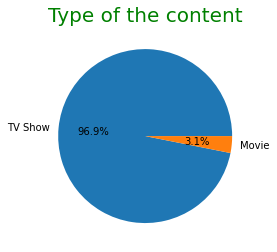

In [15]:
#TYPE 

data_type = data['type'].value_counts()/data['type'].value_counts().sum()*100
plt.pie(data_type, labels = data['type'].unique(), autopct = '%1.1f%%')
plt.title('Type of the content', fontdict={'fontsize':20, 'fontweight': 5, 'color':'green'})
plt.show()

In [16]:
data_type

Movie      96.875
TV Show     3.125
Name: type, dtype: float64

In [17]:
data['rating'].unique()

array(['TV-MA', 'PG', 'TV-14', 'PG-13', 'TV-PG', 'TV-Y', 'R', 'TV-G',
       'TV-Y7', 'G', 'NC-17', 'NR', 'TV-Y7-FV', 'UR'], dtype=object)

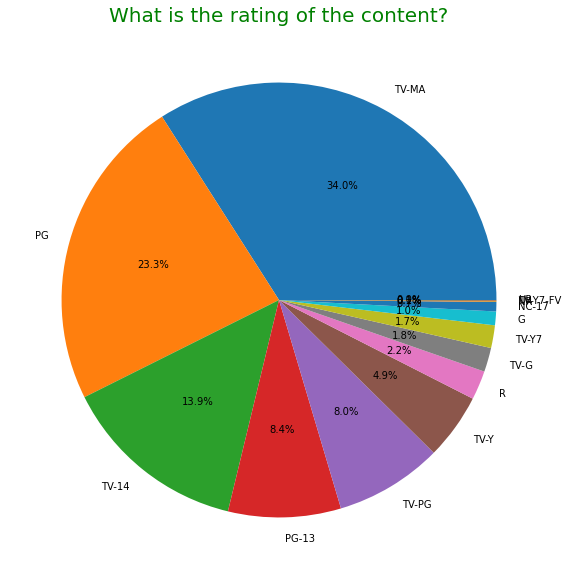

In [18]:
plt.figure(figsize=[20,10])
data_rating = data['rating'].value_counts()/data['rating'].value_counts().sum()*100
plt.pie(data_rating, labels = data['rating'].unique(), autopct = '%1.1f%%')
plt.title('What is the rating of the content?', fontdict={'fontsize':20, 'fontweight': 5, 'color':'green'})
plt.show()

<AxesSubplot:>

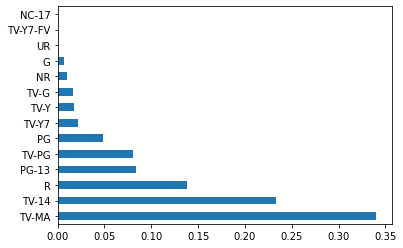

In [19]:
data.rating.value_counts(normalize=True).plot.barh()

In [20]:
#Identifying top 5 countries producing contents for netflix

data_country = data['country'].value_counts()/data['country'].value_counts().sum()*100
data_country_top_5 = data_country.head(5)
data_country_top_5

United States     38.799157
India             15.361657
United Kingdom     3.212781
Canada             1.878511
Spain              1.597612
Name: country, dtype: float64

<AxesSubplot:>

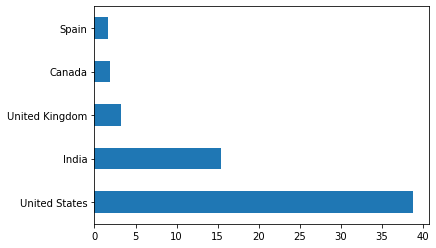

In [21]:
data_country_top_5.plot.barh()

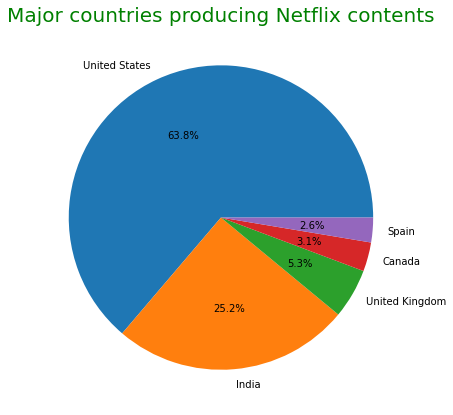

In [22]:
plt.figure(figsize=[20,7])
plt.pie(data_country_top_5, labels = ['United States','India','United Kingdom','Canada','Spain'],  autopct = '%1.1f%%')
plt.title('Major countries producing Netflix contents', fontdict={'fontsize':20, 'fontweight': 5, 'color':'green'})
plt.show()

In [23]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5696 entries, 2 to 8806
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       5696 non-null   object
 1   type          5696 non-null   object
 2   title         5696 non-null   object
 3   director      5696 non-null   object
 4   cast          5696 non-null   object
 5   country       5696 non-null   object
 6   date_added    5696 non-null   object
 7   release_year  5696 non-null   int64 
 8   rating        5696 non-null   object
 9   duration      5696 non-null   object
 10  listed_in     5696 non-null   object
 11  description   5696 non-null   object
dtypes: int64(1), object(11)
memory usage: 578.5+ KB


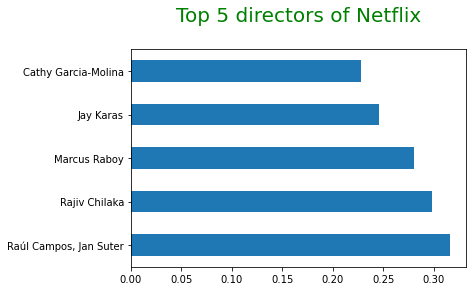

In [24]:
#top 5 directors of Netflix

data_directors = data['director'].value_counts()/data['director'].value_counts().sum()*100
data_directors_top_5 = data_directors.head(5)
data_directors_top_5.plot.barh()
plt.title('Top 5 directors of Netflix\n', fontdict={'fontsize':20, 'fontweight': 5, 'color':'green'})
plt.show()

In [25]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5696 entries, 2 to 8806
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       5696 non-null   object
 1   type          5696 non-null   object
 2   title         5696 non-null   object
 3   director      5696 non-null   object
 4   cast          5696 non-null   object
 5   country       5696 non-null   object
 6   date_added    5696 non-null   object
 7   release_year  5696 non-null   int64 
 8   rating        5696 non-null   object
 9   duration      5696 non-null   object
 10  listed_in     5696 non-null   object
 11  description   5696 non-null   object
dtypes: int64(1), object(11)
memory usage: 578.5+ KB


In [26]:
data['date_added'].head()

2    September 24, 2021
5    September 24, 2021
6    September 24, 2021
7    September 24, 2021
8    September 24, 2021
Name: date_added, dtype: object

In [27]:
data['month'] = None

In [28]:
data.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description,month
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",United States,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...,None
5,s6,TV Show,Midnight Mass,Mike Flanagan,"Kate Siegel, Zach Gilford, Hamish Linklater, H...",United States,"September 24, 2021",2021,TV-MA,1 Season,"TV Dramas, TV Horror, TV Mysteries",The arrival of a charismatic young priest brin...,None
6,s7,Movie,My Little Pony: A New Generation,"Robert Cullen, José Luis Ucha","Vanessa Hudgens, Kimiko Glenn, James Marsden, ...",United States,"September 24, 2021",2021,PG,91 min,Children & Family Movies,Equestria's divided. But a bright-eyed hero be...,None
7,s8,Movie,Sankofa,Haile Gerima,"Kofi Ghanaba, Oyafunmike Ogunlano, Alexandra D...","United States, Ghana, Burkina Faso, United Kin...","September 24, 2021",1993,TV-MA,125 min,"Dramas, Independent Movies, International Movies","On a photo shoot in Ghana, an American model s...",None
8,s9,TV Show,The Great British Baking Show,Andy Devonshire,"Mel Giedroyc, Sue Perkins, Mary Berry, Paul Ho...",United Kingdom,"September 24, 2021",2021,TV-14,9 Seasons,"British TV Shows, Reality TV",A talented batch of amateur bakers face off in...,None


In [29]:
data_split = data['date_added'].str.split(' ', expand=True)
data_split = data_split.rename(columns={0:'Month',1:'Date',2:'Year'})
data_split.head()

,Month,Date,Year,3
2,September,"24,",2021,None
5,September,"24,",2021,None
6,September,"24,",2021,None
7,September,"24,",2021,None
8,September,"24,",2021,None


In [30]:
data['month']=data_split['Month']
data['Date']=data_split['Date']
data['Year']=data_split['Year']

In [31]:
data.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description,month,Date,Year
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",United States,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...,September,"24,",2021
5,s6,TV Show,Midnight Mass,Mike Flanagan,"Kate Siegel, Zach Gilford, Hamish Linklater, H...",United States,"September 24, 2021",2021,TV-MA,1 Season,"TV Dramas, TV Horror, TV Mysteries",The arrival of a charismatic young priest brin...,September,"24,",2021
6,s7,Movie,My Little Pony: A New Generation,"Robert Cullen, José Luis Ucha","Vanessa Hudgens, Kimiko Glenn, James Marsden, ...",United States,"September 24, 2021",2021,PG,91 min,Children & Family Movies,Equestria's divided. But a bright-eyed hero be...,September,"24,",2021
7,s8,Movie,Sankofa,Haile Gerima,"Kofi Ghanaba, Oyafunmike Ogunlano, Alexandra D...","United States, Ghana, Burkina Faso, United Kin...","September 24, 2021",1993,TV-MA,125 min,"Dramas, Independent Movies, International Movies","On a photo shoot in Ghana, an American model s...",September,"24,",2021
8,s9,TV Show,The Great British Baking Show,Andy Devonshire,"Mel Giedroyc, Sue Perkins, Mary Berry, Paul Ho...",United Kingdom,"September 24, 2021",2021,TV-14,9 Seasons,"British TV Shows, Reality TV",A talented batch of amateur bakers face off in...,September,"24,",2021


In [32]:
#Analyzing month column

data['month'].unique()

array(['September', 'August', 'July', 'June', 'May', 'April', 'March',
       'February', 'January', 'December', 'November', 'October', ''],
      dtype=object)

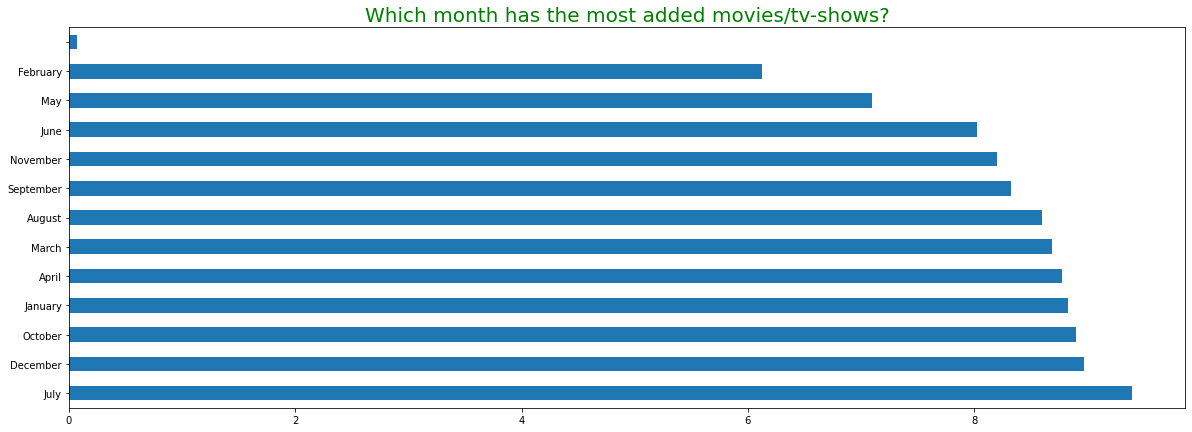

In [33]:
data_month = data['month'].value_counts()/data['month'].value_counts().sum()*100
plt.figure(figsize=[20,7])
data_month.plot.barh()
plt.title('Which month has the most added movies/tv-shows?', fontdict={'fontsize':20, 'fontweight': 5, 'color':'green'})
plt.show()

In [34]:
data_month

July         9.392556
December     8.971208
October      8.900983
January      8.830758
April        8.778090
March        8.690309
August       8.602528
September    8.321629
November     8.198736
June         8.023174
May          7.092697
February     6.127107
             0.070225
Name: month, dtype: float64

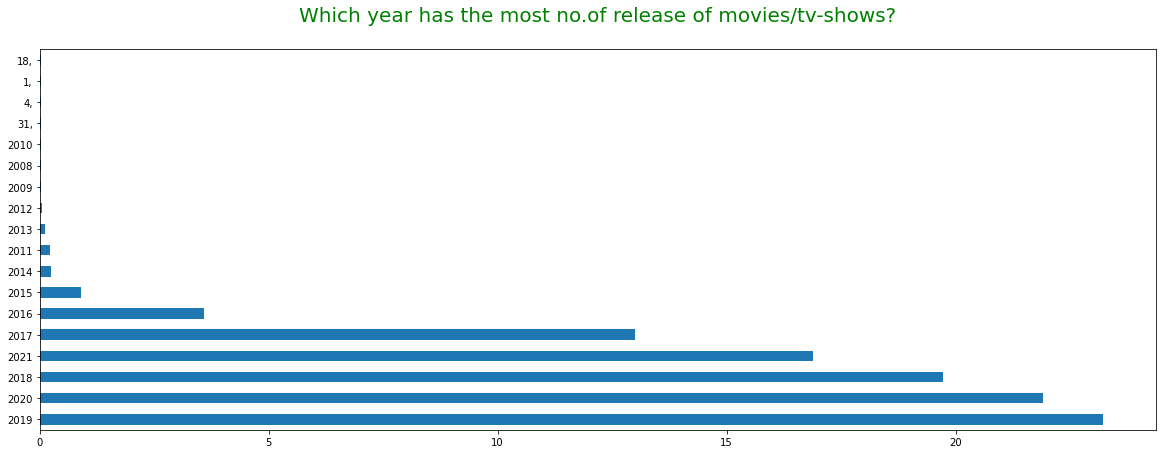

In [35]:
#Which year has the highest number of release

data_year = data['Year'].value_counts()/data['Year'].value_counts().sum()*100
plt.figure(figsize=[20,7])
data_year.plot.barh()
plt.title('Which year has the most no.of release of movies/tv-shows?\n', fontdict={'fontsize':20, 'fontweight': 5, 'color':'green'})
plt.show()

In [36]:
data_year.head()

2019    23.209270
2020    21.910112
2018    19.733146
2021    16.889045
2017    12.991573
Name: Year, dtype: float64

In [37]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5696 entries, 2 to 8806
Data columns (total 15 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       5696 non-null   object
 1   type          5696 non-null   object
 2   title         5696 non-null   object
 3   director      5696 non-null   object
 4   cast          5696 non-null   object
 5   country       5696 non-null   object
 6   date_added    5696 non-null   object
 7   release_year  5696 non-null   int64 
 8   rating        5696 non-null   object
 9   duration      5696 non-null   object
 10  listed_in     5696 non-null   object
 11  description   5696 non-null   object
 12  month         5696 non-null   object
 13  Date          5696 non-null   object
 14  Year          5696 non-null   object
dtypes: int64(1), object(14)
memory usage: 712.0+ KB


In [38]:
data_all_TV_shows = data[data['type']=='TV Show']
data_all_TV_shows.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description,month,Date,Year
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",United States,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...,September,"24,",2021
5,s6,TV Show,Midnight Mass,Mike Flanagan,"Kate Siegel, Zach Gilford, Hamish Linklater, H...",United States,"September 24, 2021",2021,TV-MA,1 Season,"TV Dramas, TV Horror, TV Mysteries",The arrival of a charismatic young priest brin...,September,"24,",2021
8,s9,TV Show,The Great British Baking Show,Andy Devonshire,"Mel Giedroyc, Sue Perkins, Mary Berry, Paul Ho...",United Kingdom,"September 24, 2021",2021,TV-14,9 Seasons,"British TV Shows, Reality TV",A talented batch of amateur bakers face off in...,September,"24,",2021
11,s12,TV Show,Bangkok Breaking,Kongkiat Komesiri,"Sukollawat Kanarot, Sushar Manaying, Pavarit M...",United States,"September 23, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...","Struggling to earn a living in Bangkok, a man ...",September,"23,",2021
47,s48,TV Show,The Smart Money Woman,Bunmi Ajakaiye,"Osas Ighodaro, Ini Dima-Okojie, Kemi Lala Akin...",United States,"September 16, 2021",2020,TV-MA,1 Season,"International TV Shows, Romantic TV Shows, TV ...",Five glamorous millennials strive for success ...,September,"16,",2021


Now let's analyse TV shows only

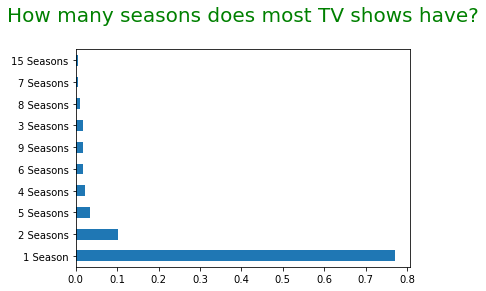

In [39]:
data_all_TV_shows['duration'].value_counts()/data_all_TV_shows['duration'].value_counts().sum()*100
data_all_TV_shows['duration'].value_counts(normalize=True).plot.barh()
plt.title('How many seasons does most TV shows have?\n', fontdict={'fontsize':20, 'fontweight':5, 'color':'g'})
plt.show()

We can clearly see that most TV Shows have only 1 season in Netflix

In [40]:
data_all_TV_shows.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 178 entries, 2 to 8599
Data columns (total 15 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       178 non-null    object
 1   type          178 non-null    object
 2   title         178 non-null    object
 3   director      178 non-null    object
 4   cast          178 non-null    object
 5   country       178 non-null    object
 6   date_added    178 non-null    object
 7   release_year  178 non-null    int64 
 8   rating        178 non-null    object
 9   duration      178 non-null    object
 10  listed_in     178 non-null    object
 11  description   178 non-null    object
 12  month         178 non-null    object
 13  Date          178 non-null    object
 14  Year          178 non-null    object
dtypes: int64(1), object(14)
memory usage: 22.2+ KB


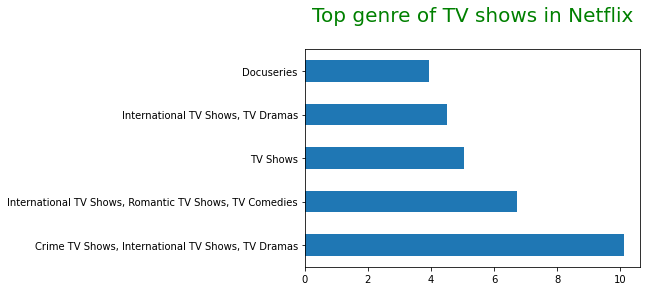

In [41]:
#Top 5 genre of TV shows in Netflix that most production companies make

top5_genre = data_all_TV_shows['listed_in'].value_counts()/data_all_TV_shows['listed_in'].value_counts().sum()*100
top5_tv_genre = top5_genre.head(5)
top5_tv_genre.plot.barh()
plt.title('Top genre of TV shows in Netflix\n', fontdict={'fontsize':20,'fontweight':5,'color':'g'})
plt.show()

In [42]:
data_all_movies = data[data['type']=='Movie']
data_all_movies.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description,month,Date,Year
6,s7,Movie,My Little Pony: A New Generation,"Robert Cullen, José Luis Ucha","Vanessa Hudgens, Kimiko Glenn, James Marsden, ...",United States,"September 24, 2021",2021,PG,91 min,Children & Family Movies,Equestria's divided. But a bright-eyed hero be...,September,"24,",2021
7,s8,Movie,Sankofa,Haile Gerima,"Kofi Ghanaba, Oyafunmike Ogunlano, Alexandra D...","United States, Ghana, Burkina Faso, United Kin...","September 24, 2021",1993,TV-MA,125 min,"Dramas, Independent Movies, International Movies","On a photo shoot in Ghana, an American model s...",September,"24,",2021
9,s10,Movie,The Starling,Theodore Melfi,"Melissa McCarthy, Chris O'Dowd, Kevin Kline, T...",United States,"September 24, 2021",2021,PG-13,104 min,"Comedies, Dramas",A woman adjusting to life after a loss contend...,September,"24,",2021
12,s13,Movie,Je Suis Karl,Christian Schwochow,"Luna Wedler, Jannis Niewöhner, Milan Peschel, ...","Germany, Czech Republic","September 23, 2021",2021,TV-MA,127 min,"Dramas, International Movies",After most of her family is murdered in a terr...,September,"23,",2021
13,s14,Movie,Confessions of an Invisible Girl,Bruno Garotti,"Klara Castanho, Lucca Picon, Júlia Gomes, Marc...",United States,"September 22, 2021",2021,TV-PG,91 min,"Children & Family Movies, Comedies",When the clever but socially-awkward Tetê join...,September,"22,",2021


In [43]:
movie_duration = data_all_movies['duration'].value_counts()/data_all_movies['duration'].value_counts().sum()*100
movie_duration.head(5)

94 min    2.537151
97 min    2.464661
93 min    2.446539
95 min    2.337804
90 min    2.319681
Name: duration, dtype: float64

In [44]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5696 entries, 2 to 8806
Data columns (total 15 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       5696 non-null   object
 1   type          5696 non-null   object
 2   title         5696 non-null   object
 3   director      5696 non-null   object
 4   cast          5696 non-null   object
 5   country       5696 non-null   object
 6   date_added    5696 non-null   object
 7   release_year  5696 non-null   int64 
 8   rating        5696 non-null   object
 9   duration      5696 non-null   object
 10  listed_in     5696 non-null   object
 11  description   5696 non-null   object
 12  month         5696 non-null   object
 13  Date          5696 non-null   object
 14  Year          5696 non-null   object
dtypes: int64(1), object(14)
memory usage: 712.0+ KB


Text(0.5, 1.0, 'Top genre for movies in Netflix that is made\n')

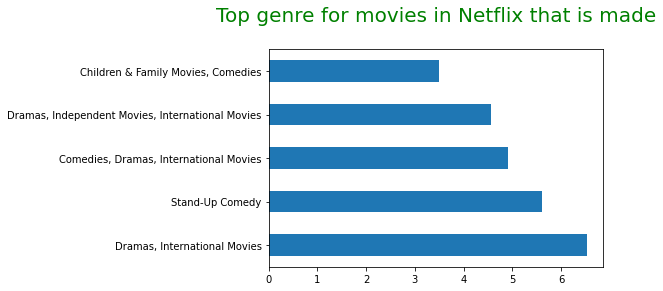

In [45]:
top5_movie_genre = data_all_movies['listed_in'].value_counts()/data_all_movies['listed_in'].value_counts().sum()*100
top5_movie_genre = top5_movie_genre.head(5)
top5_movie_genre.plot.barh()
plt.title('Top genre for movies in Netflix that is made\n', fontdict={'fontsize':20, 'fontweight':10, 'color':'g'})

In [46]:
top5_movie_genre

Dramas, International Movies                        6.542225
Stand-Up Comedy                                     5.599855
Comedies, Dramas, International Movies              4.911200
Dramas, Independent Movies, International Movies    4.566872
Children & Family Movies, Comedies                  3.497644
Name: listed_in, dtype: float64

Now let us understand some more patterns by taking 2 variables and to understnad the relationship between the two

In [47]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5696 entries, 2 to 8806
Data columns (total 15 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       5696 non-null   object
 1   type          5696 non-null   object
 2   title         5696 non-null   object
 3   director      5696 non-null   object
 4   cast          5696 non-null   object
 5   country       5696 non-null   object
 6   date_added    5696 non-null   object
 7   release_year  5696 non-null   int64 
 8   rating        5696 non-null   object
 9   duration      5696 non-null   object
 10  listed_in     5696 non-null   object
 11  description   5696 non-null   object
 12  month         5696 non-null   object
 13  Date          5696 non-null   object
 14  Year          5696 non-null   object
dtypes: int64(1), object(14)
memory usage: 712.0+ KB


1. Taking type of the content and rating of the content as our two variables. We will be doingchi-square test because both the variables are categorical variables 
Our significance level is 5% that is 0.05

Null Hypothesis: There's no significant relationship/association between the type of the content and rating of the content

Alternate Hypothesis: There's a significant relationship/association between teh type of the content and rating of the content

A significance level of 0.05 indicates a 5% risk of concluding that an association between the variables exists when there is no actual association.

P-value ≤ α: The variables have a statistically significant association (Reject H0)
If the p-value is less than or equal to the significance level, you reject the null hypothesis and conclude that there is a statistically significant association between the variables.

P-value > α: Cannot conclude that the variables are associated (Fail to reject H0)
If the p-value is larger than the significance level, you fail to reject the null hypothesis because there is not enough evidence to conclude that the variables are associated.

In [71]:
type_vs_rating = pd.crosstab(data['type'],data['rating'])
type_vs_rating

rating,G,NC-17,NR,PG,PG-13,R,TV-14,TV-G,TV-MA,TV-PG,TV-Y,TV-Y7,TV-Y7-FV,UR
type,,,,,,,,,,,,,,
Movie,40,2,58,279,477,788,1279,93,1842,441,97,116,3,3
TV Show,0,0,0,0,0,1,50,3,97,15,5,7,0,0


In [81]:
pip install researchpy

Note: you may need to restart the kernel to use updated packages.


In [82]:
import researchpy

In [89]:
crosstab, res, exp = researchpy.crosstab(data['type'],data['rating'], test='chi-square', expected_freqs=True)

In [90]:
#Observed value
crosstab

rating                                                              \
rating       G NC-17  NR   PG PG-13    R TV-14 TV-G TV-MA TV-PG TV-Y TV-Y7   
type                                                                         
Movie       40     2  58  279   477  788  1279   93  1842   441   97   116   
TV Show      0     0   0    0     0    1    50    3    97    15    5     7   
All         40     2  58  279   477  789  1329   96  1939   456  102   123   

                           
rating  TV-Y7-FV UR   All  
type                       
Movie          3  3  5518  
TV Show        0  0   178  
All            3  3  5696

In [91]:
#Expected value
exp

rating                                                                \
rating       G   NC-17       NR         PG      PG-13          R       TV-14   
type                                                                           
Movie    38.75  1.9375  56.1875  270.28125  462.09375  764.34375  1287.46875   
TV Show   1.25  0.0625   1.8125    8.71875   14.90625   24.65625    41.53125   

                                                                         
rating   TV-G       TV-MA   TV-PG     TV-Y      TV-Y7 TV-Y7-FV       UR  
type                                                                     
Movie    93.0  1878.40625  441.75  98.8125  119.15625  2.90625  2.90625  
TV Show   3.0    60.59375   14.25   3.1875    3.84375  0.09375  0.09375

In [92]:
#Result of chi-square test
res

,Chi-square test,results
0,Pearson Chi-square ( 13.0) =,79.3774
1,p-value =,0.0000
2,Cramer's V =,0.1180


Since our p-value is 0.0000 which is less than 0.05 which is our significance level, we reject null hypothesis and accept alternate hypothesis.

Our alternate hypothesis is that "There's a significant relationship between the type of content and rating of the content"

Cramer's V is a measure of the strenght of association/strenght of relationship between two variables. It is denoted by V. 

Association is measured on a scale of 0 to 1

-> If V=0, The variables are not associated

-> If V=1, The variables are perfectly associated

-> If V<0.25, The association is weak

-> If V>0.75, The association is strong

-> If 0.25<V<0.75, The association is moderate

Our Cramer's V value is 0.11 which is less than 0.25. Our association between the two variables is week. There's a weak association between the type of content and rating of the content

In [100]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5696 entries, 2 to 8806
Data columns (total 15 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       5696 non-null   object
 1   type          5696 non-null   object
 2   title         5696 non-null   object
 3   director      5696 non-null   object
 4   cast          5696 non-null   object
 5   country       5696 non-null   object
 6   date_added    5696 non-null   object
 7   release_year  5696 non-null   int64 
 8   rating        5696 non-null   object
 9   duration      5696 non-null   object
 10  listed_in     5696 non-null   object
 11  description   5696 non-null   object
 12  month         5696 non-null   object
 13  Date          5696 non-null   object
 14  Year          5696 non-null   object
dtypes: int64(1), object(14)
memory usage: 872.0+ KB


Now we will be looking at the type of content and country where it is produced. So, we will be perofrming chi square test taking our two categorical variables which is the type of content and country where it is produced.

Null Hypothesis: There's no significant relationship between the type of content & the country where it is produced
Alternate Hypothesis: There's a significanr relationship between the type of content and country where it is produced

Significance value: 0.05

In [120]:
pd.crosstab(data['type'],data['country'])

country,", France, Algeria",Argentina,"Argentina, Brazil, France, Poland, Germany, Denmark","Argentina, Chile","Argentina, Chile, Peru","Argentina, France","Argentina, France, United States, Germany, Qatar","Argentina, Spain","Argentina, United States","Argentina, Uruguay, Serbia",...,"United States, United Kingdom, Spain, South Korea",Uruguay,"Uruguay, Argentina","Uruguay, Argentina, Germany, Spain","Uruguay, Argentina, Spain","Uruguay, Guatemala","Uruguay, Spain, Mexico",Venezuela,Vietnam,Zimbabwe
type,,,,,,,,,,,,,,,,,,,,,
Movie,1,34,1,2,1,1,1,7,1,1,...,1,2,1,1,1,1,1,1,7,1
TV Show,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [121]:
crosstab, res, exp = researchpy.crosstab(data['type'],data['country'], test='chi-square', expected_freqs=True)

In [123]:
#Observed value
crosstab

country            \
country , France, Algeria Argentina   
type                                  
Movie                   1        34   
TV Show                 0         1   
All                     1        35   

                                                                              \
country Argentina, Brazil, France, Poland, Germany, Denmark Argentina, Chile   
type                                                                           
Movie                                                    1                 2   
TV Show                                                  0                 0   
All                                                      1                 2   

                                                  \
country Argentina, Chile, Peru Argentina, France   
type                                               
Movie                        1                 1   
TV Show                      0                 0   
All                          1                 1   

                                                                           \
country Argentina, France, United States, Germany, Qatar Argentina, Spain   
type                                                                        
Movie                                                  1                7   
TV Show                                                0                0   
All                                                    1                7   

                                                             ...          \
country Argentina, United States Argentina, Uruguay, Serbia  ... Uruguay   
type                                                         ...           
Movie                          1                          1  ...       2   
TV Show                        0                          0  ...       0   
All                            1                          1  ...       2   

                                                               \
country Uruguay, Argentina Uruguay, Argentina, Germany, Spain   
type                                                            
Movie                    1                                  1   
TV Show                  0                                  0   
All                      1                                  1   

                                                                             \
country Uruguay, Argentina, Spain Uruguay, Guatemala Uruguay, Spain, Mexico   
type                                                                          
Movie                           1                  1                      1   
TV Show                         0                  0                      0   
All                             1                  1                      1   

                                          
country Venezuela Vietnam Zimbabwe   All  
type                                      
Movie           1       7        1  5518  
TV Show         0       0        0   178  
All             1       7        1  5696  

[3 rows x 605 columns]

In [124]:
#Expected value
exp

country            \
country , France, Algeria Argentina   
type                                  
Movie             0.96875  33.90625   
TV Show           0.03125   1.09375   

                                                                              \
country Argentina, Brazil, France, Poland, Germany, Denmark Argentina, Chile   
type                                                                           
Movie                                              0.96875            1.9375   
TV Show                                            0.03125            0.0625   

                                                  \
country Argentina, Chile, Peru Argentina, France   
type                                               
Movie                  0.96875           0.96875   
TV Show                0.03125           0.03125   

                                                                           \
country Argentina, France, United States, Germany, Qatar Argentina, Spain   
type                                                                        
Movie                                            0.96875          6.78125   
TV Show                                          0.03125          0.21875   

                                                             ...  \
country Argentina, United States Argentina, Uruguay, Serbia  ...   
type                                                         ...   
Movie                    0.96875                    0.96875  ...   
TV Show                  0.03125                    0.03125  ...   

                                                                   \
country United States, United Kingdom, Spain, South Korea Uruguay   
type                                                                
Movie                                             0.96875  1.9375   
TV Show                                           0.03125  0.0625   

                                                               \
country Uruguay, Argentina Uruguay, Argentina, Germany, Spain   
type                                                            
Movie              0.96875                            0.96875   
TV Show            0.03125                            0.03125   

                                                                             \
country Uruguay, Argentina, Spain Uruguay, Guatemala Uruguay, Spain, Mexico   
type                                                                          
Movie                     0.96875            0.96875                0.96875   
TV Show                   0.03125            0.03125                0.03125   

                                     
country Venezuela  Vietnam Zimbabwe  
type                                 
Movie     0.96875  6.78125  0.96875  
TV Show   0.03125  0.21875  0.03125  

[2 rows x 604 columns]

In [125]:
#chi-square test
res

,Chi-square test,results
0,Pearson Chi-square ( 603.0) =,665.5668
1,p-value =,0.0390
2,Cramer's V =,0.3418


The p-value = 0.0390 which is less than our significance value that is 0.05. Hence, we reject our null hypothesis and accept alternate hypothesis. 

Our alternate hypothesis is "There's a signifcant correlation between the type of content and the country where it is produced"

Our Cramer's V value is 0.3418 which is greater than 0.25 and less than 0.75. So, we can say that our association between the type & the country where it is produced is quite moderate. 


In [126]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5696 entries, 2 to 8806
Data columns (total 15 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       5696 non-null   object
 1   type          5696 non-null   object
 2   title         5696 non-null   object
 3   director      5696 non-null   object
 4   cast          5696 non-null   object
 5   country       5696 non-null   object
 6   date_added    5696 non-null   object
 7   release_year  5696 non-null   int64 
 8   rating        5696 non-null   object
 9   duration      5696 non-null   object
 10  listed_in     5696 non-null   object
 11  description   5696 non-null   object
 12  month         5696 non-null   object
 13  Date          5696 non-null   object
 14  Year          5696 non-null   object
dtypes: int64(1), object(14)
memory usage: 872.0+ KB


Let us test the association between rating and country where it is produced. Let's see if there's any relationship between the two

At significance level 0.05, we need to test our hypothesis by using chi-square technique

Null Hypthesis: There's no relationship between the rating of the content and the country where it is produced

Alternate Hypothesis: There's a significant relationship between the rating of the content and the country where it is produced


In [127]:
crosstab, res, exp = researchpy.crosstab(data['rating'],data['country'], test='chi-square', expected_freqs=True)

In [128]:
#Observed value
crosstab

country            \
country  , France, Algeria Argentina   
rating                                 
G                        0         0   
NC-17                    0         0   
NR                       0         2   
PG                       0         0   
PG-13                    0         0   
R                        0         1   
TV-14                    1         3   
TV-G                     0         0   
TV-MA                    0        27   
TV-PG                    0         2   
TV-Y                     0         0   
TV-Y7                    0         0   
TV-Y7-FV                 0         0   
UR                       0         0   
All                      1        35   

                                                                               \
country  Argentina, Brazil, France, Poland, Germany, Denmark Argentina, Chile   
rating                                                                          
G                                                         0                 0   
NC-17                                                     0                 0   
NR                                                        0                 0   
PG                                                        0                 0   
PG-13                                                     0                 0   
R                                                         0                 0   
TV-14                                                     1                 1   
TV-G                                                      0                 0   
TV-MA                                                     0                 1   
TV-PG                                                     0                 0   
TV-Y                                                      0                 0   
TV-Y7                                                     0                 0   
TV-Y7-FV                                                  0                 0   
UR                                                        0                 0   
All                                                       1                 2   

                                                   \
country  Argentina, Chile, Peru Argentina, France   
rating                                              
G                             0                 0   
NC-17                         0                 0   
NR                            0                 0   
PG                            0                 0   
PG-13                         0                 0   
R                             0                 0   
TV-14                         0                 0   
TV-G                          0                 0   
TV-MA                         1                 1   
TV-PG                         0                 0   
TV-Y                          0                 0   
TV-Y7                         0                 0   
TV-Y7-FV                      0                 0   
UR                            0                 0   
All                           1                 1   

                                                                            \
country  Argentina, France, United States, Germany, Qatar Argentina, Spain   
rating                                                                       
G                                                       0                0   
NC-17                                                   0                0   
NR                                                      0                0   
PG                                                      0                1   
PG-13                                                   0                0   
R                                                       0                0   
TV-14                                                   0                0   
TV-G                                                    0                0   
TV-MA                     

In [129]:
#expected value
exp

country             \
country  , France, Algeria  Argentina   
rating                                  
G                 0.007022   0.245787   
NC-17             0.000351   0.012289   
NR                0.010183   0.356390   
PG                0.048982   1.714361   
PG-13             0.083743   2.931004   
R                 0.138518   4.848139   
TV-14             0.233322   8.166257   
TV-G              0.016854   0.589888   
TV-MA             0.340414  11.914501   
TV-PG             0.080056   2.801966   
TV-Y              0.017907   0.626756   
TV-Y7             0.021594   0.755794   
TV-Y7-FV          0.000527   0.018434   
UR                0.000527   0.018434   

                                                                               \
country  Argentina, Brazil, France, Poland, Germany, Denmark Argentina, Chile   
rating                                                                          
G                                                  0.007022          0.014045   
NC-17                                              0.000351          0.000702   
NR                                                 0.010183          0.020365   
PG                                                 0.048982          0.097963   
PG-13                                              0.083743          0.167486   
R                                                  0.138518          0.277037   
TV-14                                              0.233322          0.466643   
TV-G                                               0.016854          0.033708   
TV-MA                                              0.340414          0.680829   
TV-PG                                              0.080056          0.160112   
TV-Y                                               0.017907          0.035815   
TV-Y7                                              0.021594          0.043188   
TV-Y7-FV                                           0.000527          0.001053   
UR                                                 0.000527          0.001053   

                                                   \
country  Argentina, Chile, Peru Argentina, France   
rating                                              
G                      0.007022          0.007022   
NC-17                  0.000351          0.000351   
NR                     0.010183          0.010183   
PG                     0.048982          0.048982   
PG-13                  0.083743          0.083743   
R                      0.138518          0.138518   
TV-14                  0.233322          0.233322   
TV-G                   0.016854          0.016854   
TV-MA                  0.340414          0.340414   
TV-PG                  0.080056          0.080056   
TV-Y                   0.017907          0.017907   
TV-Y7                  0.021594          0.021594   
TV-Y7-FV               0.000527          0.000527   
UR                     0.000527          0.000527   

                                                                            \
country  Argentina, France, United States, Germany, Qatar Argentina, Spain   
rating                                                                       
G                                                0.007022         0.049157   
NC-17                                            0.000351         0.002458   
NR                                               0.010183         0.071278   
PG                                               0.048982         0.342872   
PG-13                                            0.083743         0.586201   
R                                                0.138518         0.969628   
TV-14                                            0.233322         1.633251   
TV-G                                             0.016854         0.117978   
TV-MA                                            0.340414         2.382900   
TV-PG                                            0.080056         0.560393   
TV-Y                       

In [130]:
#chi-square test & Cramer's V test 
res

,Chi-square test,results
0,Pearson Chi-square ( 7839.0) =,12752.4625
1,p-value =,0.0000
2,Cramer's V =,0.4150


Since our p-value = 0.0000 which is less than our significance value that is 0.05, we reject our null hypothesis and accept our alternate hypothesis. 

Accepted alternate Hypothesis is "There's a significant relationship between the rating of the content and the country where it is produced.

Our Cramer's V value is 0.41. Since our V value lies in the range of 0.25<=V<=0.75, we can say that the association is moderate. 

# FINDINGS FROM THE ANALYSIS

While performing EDA, we found some interesting insights. Let's see what are those interesting insights
1. Majority of content that is being produced by Netflix are TV shows by 97%

2. Rating of those contents are TV-MA. In the USA, TV-MA is the rating that shows that a program is intended for adults. ‘MA’ stands for ‘mature audiences’.

3. Major countries producing Netflix content is USA by 63%. Then, India and after India, it's UK followed by Canada.

4. July is the month has the most number of release in a year followed by December, October and Janauary. 

5. 2019 is the year which has the most number of release of TV/Movie shows

6. Most of the TV shows have 1 season while most of the movies duration is 94 minutes.

7. Top 5 genre for TV shows in Netflix:

a) Crime TV Shows, International TV Shows, TV Dramas

b) International TV Shows, Romantic TV Shows, TV Comedies

c) TV Shows

d) International TV Shows, TV Dramas

e) Stand-Up Comedy & Talk Shows, TV Comedies

8. Top 5 genre for movies in Netflix:

a) Dramas, International Movies

b) Stand-Up Comedy

c) Comedies, Dramas, International Movies

d) Dramas, Independent Movies, International Movies

e) Children & Family Movies, Comedies

8. We even found that there's a significant relationship between the type of the content and rating of the content as well the country it is producing. 

9. There's a significant relationship between the rating of the content and the country where it is produced. Practically speaking, if we talk about our findings, we have observed that ratings of the majority of content in netflix is TV-MA and the highest number of producers of netlfic content is USA. It is something which is quite noticable actually. 
